In [1]:
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fmdtools.faultsim as fs
import fmdtools.resultdisp as rd
import quadpy
from IPython.display import HTML

In [2]:
from fmdtools.modeldef import FxnBlock
from fmdtools.modeldef import Flow
from fmdtools.modeldef import Model
from fmdtools.modeldef import m2to1

### Setting Node Positions

In [17]:
class Drone(Model):
    def __init__(self, params={}):
        super().__init__()
        self.params=params
        #add flows to the model
        self.add_flow('Force_ST', {})
        self.add_flow('Force_Lin', {})
        self.add_flow('Force_GR' , {})
        self.add_flow('Force_LG', {})
        self.add_flow('EE_1', {})
        self.add_flow('EEmot', {})
        self.add_flow('EEctl', {})
        self.add_flow('Ctl1', {})
        self.add_flow('DOFs', {})
        self.add_flow('Env1', {})
        # custom flows
        self.add_flow('Dir1', {})
        #add functions to the model
        flows=['EEctl', 'Force_ST']
        self.add_fxn('StoreEE',['EE_1', 'Force_ST'])
        self.add_fxn('DistEE', ['EE_1','EEmot','EEctl', 'Force_ST'])
        self.add_fxn('AffectDOF',['EEmot','Ctl1','DOFs','Force_Lin'])
        self.add_fxn('CtlDOF', ['EEctl', 'Dir1', 'Ctl1', 'DOFs', 'Force_ST'])
        self.add_fxn('Planpath', ['EEctl', 'Env1','Dir1', 'Force_ST'])
        self.add_fxn('Trajectory', ['Env1','DOFs','Dir1', 'Force_GR'] )
        self.add_fxn('EngageLand',['Force_GR', 'Force_LG'])
        self.add_fxn('HoldPayload',['Force_LG', 'Force_Lin', 'Force_ST'])
        self.add_fxn('ViewEnv', ['Env1'])
        
        self.construct_graph()
        #self.construct_graph(graph_pos = {'StoreEE': [0.13322414342899602, 0.21477632506511113],
 #'DistEE': [0.5896210930551233, -0.08591779042202319],
 #'AffectDOF': [0.4267774855331683, 0.4401963508136246],
 #'CtlDOF': [-0.5, 0.8660253882408142],
 #'Planpath': [-0.9396925568580627, 0.3420202136039734],
 #'Trajectory': [-0.7402574040187169, -0.6565140488613741],
 #'EngageLand': [0.02927033251370781, -0.3981198969531473],
 #'HoldPayload': [-0.5397160219633146, 0.5493088305815919],
 #'ViewEnv': [0.7660443782806396, -0.642787754535675]})

In [18]:
mdl = Drone()

As shown below, it can be difficult to make sense of a model structure using the default shell graph layout. We might instead want to see something that more closely approximates a flow chart of the system.

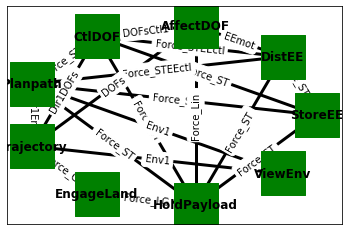

In [24]:
rd.graph.show(mdl.graph)

To set node positions, we can use ``rd.graph.set_pos()``, which lets one drag the nodes to their desired locations. If a model is sent to ``set_pos``, it will set those locations in the model going forward, though it is good practice to save node locations when one is done in the script or the model class file (they can be used as inputs to ``construct_graph()``.

In [20]:
%matplotlib qt
pos = rd.graph.set_pos(mdl)
pos

{'StoreEE': [-1.0787279392101061, -0.06903523859088145],
 'DistEE': [-0.361531174332526, -0.0935883732235363],
 'AffectDOF': [0.36541282312106205, -0.09674444529230719],
 'CtlDOF': [0.4664934329906758, 0.5822138245848214],
 'Planpath': [-0.7095750728126631, 0.8482786785038505],
 'Trajectory': [1.1006824683444765, -0.10423208715241583],
 'EngageLand': [0.8423521094741182, -0.8813666134484857],
 'HoldPayload': [-0.5857395187723944, -0.86974898769837],
 'ViewEnv': [1.1035500215472247, 0.9373523025760659]}

In [25]:
graph_pos = {'StoreEE': [-1.0787279392101061, -0.06903523859088145],
 'DistEE': [-0.361531174332526, -0.0935883732235363],
 'AffectDOF': [0.36541282312106205, -0.09674444529230719],
 'CtlDOF': [0.4664934329906758, 0.5822138245848214],
 'Planpath': [-0.7095750728126631, 0.8482786785038505],
 'Trajectory': [1.1006824683444765, -0.10423208715241583],
 'EngageLand': [0.8423521094741182, -0.8813666134484857],
 'HoldPayload': [-0.5857395187723944, -0.86974898769837],
 'ViewEnv': [1.1035500215472247, 0.9373523025760659]}

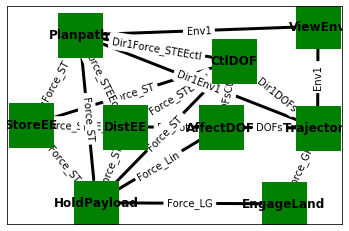

In [26]:
%matplotlib inline
rd.graph.show(mdl)

We can use the same process to arrange the bipartite graph:

In [27]:
%matplotlib qt
pos = rd.graph.set_pos(mdl, gtype='bipartite')
pos

In [28]:
pos

{'StoreEE': [-1.067135163123663, 0.32466987344741055],
 'DistEE': [-0.617149602161968, 0.3165981670924663],
 'AffectDOF': [0.11827439153655106, 0.10792528450121897],
 'CtlDOF': [-0.2636856982162134, 0.42422600969836144],
 'Planpath': [-0.9347151173753852, 0.6943421719257798],
 'Trajectory': [0.6180477286739998, 0.32930706399226856],
 'EngageLand': [0.0015917696269229786, -0.2399760932810826],
 'HoldPayload': [-0.8833099612826893, -0.247201580673997],
 'ViewEnv': [0.5725955705698363, 0.6901513410348765],
 'Force_ST': [-0.8925771348524384, -0.025638904424547027],
 'Force_Lin': [-0.5530952425102891, -0.10380834289626095],
 'Force_GR': [0.568921162299461, -0.22991830334765573],
 'Force_LG': [-0.37244114591548894, -0.2355298479531287],
 'EE_1': [-0.809433489993954, 0.319191761486317],
 'EEmot': [-0.33469985340998853, 0.1307636433702345],
 'EEctl': [-0.48751243650229525, 0.4852032717825657],
 'Ctl1': [-0.06913038312848868, 0.2445174568603189],
 'DOFs': [0.2606664304933561, 0.3243482171363975

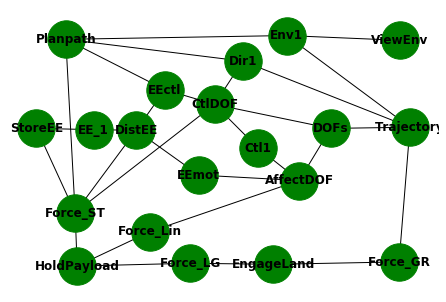

In [38]:
%matplotlib inline
rd.graph.show(mdl, gtype='bipartite', pos = bipartite_pos, scale=2)

As shown, in a large model, the Bipartite graph is often easier to arrange. Since the model will be redefined several times going forward, we will use these positions to keep a consistent layout:

In [3]:
bipartite_pos = {'StoreEE': [-1.067135163123663, 0.32466987344741055],
 'DistEE': [-0.617149602161968, 0.3165981670924663],
 'AffectDOF': [0.11827439153655106, 0.10792528450121897],
 'CtlDOF': [-0.2636856982162134, 0.42422600969836144],
 'Planpath': [-0.9347151173753852, 0.6943421719257798],
 'Trajectory': [0.6180477286739998, 0.32930706399226856],
 'EngageLand': [0.0015917696269229786, -0.2399760932810826],
 'HoldPayload': [-0.8833099612826893, -0.247201580673997],
 'ViewEnv': [0.5725955705698363, 0.6901513410348765],
 'Force_ST': [-0.8925771348524384, -0.025638904424547027],
 'Force_Lin': [-0.5530952425102891, -0.10380834289626095],
 'Force_GR': [0.568921162299461, -0.22991830334765573],
 'Force_LG': [-0.37244114591548894, -0.2355298479531287],
 'EE_1': [-0.809433489993954, 0.319191761486317],
 'EEmot': [-0.33469985340998853, 0.1307636433702345],
 'EEctl': [-0.48751243650229525, 0.4852032717825657],
 'Ctl1': [-0.06913038312848868, 0.2445174568603189],
 'DOFs': [0.2606664304933561, 0.3243482171363975],
 'Env1': [0.06157634305459603, 0.7099922980251693],
 'Dir1': [-0.13617863906968142, 0.6037252153639261]}

graph_pos = {'StoreEE': [-1.0787279392101061, -0.06903523859088145],
 'DistEE': [-0.361531174332526, -0.0935883732235363],
 'AffectDOF': [0.36541282312106205, -0.09674444529230719],
 'CtlDOF': [0.4664934329906758, 0.5822138245848214],
 'Planpath': [-0.7095750728126631, 0.8482786785038505],
 'Trajectory': [1.1006824683444765, -0.10423208715241583],
 'EngageLand': [0.8423521094741182, -0.8813666134484857],
 'HoldPayload': [-0.5857395187723944, -0.86974898769837],
 'ViewEnv': [1.1035500215472247, 0.9373523025760659]}

### Network Model

### Static Model

- graph views of faults
- static FHA/FMEA

In [4]:
class StoreEE(FxnBlock):
    def __init__(self, flows):
        self.failrate=1e-5
        self.assoc_modes({'nocharge':[1,300]})
        super().__init__(['EEout', 'FS'], flows, {'soc': 2000})
    def behavior(self, time):
        if      self.has_fault('nocharge'):   self.EEout.effort=0.0
        else: self.EEout.effort=1.0
class DistEE(FxnBlock):
    def __init__(self,flows):
        super().__init__(['EEin','EEmot','EEctl','ST'],flows, {'EEtr':1.0, 'EEte':1.0}, timely=False)
        self.failrate=1e-5
        self.assoc_modes({'short':[0.3,3000], 'degr':[0.5,1000], 'break':[0.2,2000]})
    def condfaults(self, time):
        if self.ST.support<0.5 or max(self.EEmot.rate,self.EEctl.rate)>2: 
            self.add_fault('break')
        if self.EEin.rate>2:
            self.add_fault('short')
    def behavior(self, time):
        if self.has_fault('short'): 
            self.EEte=0.0
            self.EEre=10
        elif self.has_fault('break'): 
            self.EEte=0.0
            self.EEre=0.0
        elif self.has_fault('degr'): self.EEte=0.5
        self.EEmot.effort=self.EEte*self.EEin.effort
        self.EEctl.effort=self.EEte*self.EEin.effort
        self.EEin.rate=m2to1([ self.EEin.effort, self.EEtr, max(self.EEmot.rate,self.EEctl.rate)])
class EngageLand(FxnBlock):
    def __init__(self,flows):
        super().__init__(['forcein', 'forceout'],flows, timely=False)
        self.failrate=1e-5
        self.assoc_modes({'break':[0.2, 1000], 'deform':[0.8, 1000]})
    def condfaults(self, time):
        if abs(self.forcein.value)>=2.0:      self.add_fault('break')
        elif abs(self.forcein.value)>1.5:    self.add_fault('deform')
    def behavior(self, time):
        self.forceout.value=self.forcein.value/2
            
class HoldPayload(FxnBlock):
    def __init__(self,flows):
        super().__init__(['FG', 'Lin', 'ST'],flows, timely=False)
        self.failrate=1e-6
        self.assoc_modes({'break':[0.2, 10000], 'deform':[0.8, 10000]})
    def condfaults(self, time):
        if abs(self.FG.value)>0.8:      self.add_fault('break')
        elif abs(self.FG.value)>1.0:    self.add_fault('deform')
    def behavior(self, time):
        #need to transfer FG to FA & FS???
        if self.has_fault('break'):     self.Lin.support, self.ST.support = 0,0
        elif self.has_fault('deform'):  self.Lin.support, self.ST.support = 0.5,0.5
        else:                           self.Lin.support, self.ST.support = 1.0,1.0
class AffectDOF(FxnBlock): #EEmot,Ctl1,DOFs,Force_Lin HSig_DOFs, RSig_DOFs
    def __init__(self, flows):     
        super().__init__(['EEin', 'Ctlin','DOF','Force'], flows,{'Eto': 1.0, 'Eti':1.0, 'Ct':1.0, 'Mt':1.0, 'Pt':1.0}, timely=False)
        self.failrate=1e-5
        self.assoc_modes({'short':[0.1, 200],'openc':[0.1, 200],'ctlup':[0.2, 500],'ctldn':[0.2, 500],
                          'ctlbreak':[0.2, 1000], 'mechbreak':[0.1, 500], 'mechfriction':[0.05, 500],
                          'propwarp':[0.01, 200],'propstuck':[0.02, 200], 'propbreak':[0.03, 200]})
    def behavior(self, time):
        self.Eti=1.0
        self.Eto=1.0
        if self.has_fault('short'):
            self.Eti=10
            self.Eto=0.0
        elif self.has_fault('openc'):
            self.Eti=0.0
            self.Eto=0.0
        if self.has_fault('ctlbreak'): self.Ct=0.0
        elif self.has_fault('ctldn'):  self.Ct=0.5
        elif self.has_fault('ctlup'):  self.Ct=2.0
        if self.has_fault('mechbreak'): self.Mt=0.0
        elif self.has_fault('mechfriction'):
            self.Mt=0.5
            self.Eti=2.0
        if self.has_fault('propstuck'):
            self.Pt=0.0
            self.Mt=0.0
            self.Eti=4.0
        elif self.has_fault('propbreak'): self.Pt=0.0
        elif self.has_fault('propwarp'):  self.Pt=0.5
        
        self.EEin.rate=self.Eti

        self.DOF.uppwr=self.Eto*self.Eti*self.Ctlin.upward*self.Ct*self.Mt*self.Pt
        self.DOF.planpwr=self.Eto*self.Eti*self.Ctlin.forward*self.Ct*self.Mt*self.Pt    
        
class CtlDOF(FxnBlock):
    def __init__(self, flows):
        super().__init__(['EEin','Dir','Ctl','DOFs','FS'],flows, {'Cs':1.0})
        self.failrate=1e-5
        self.assoc_modes({'noctl':[0.2, 10000], 'degctl':[0.8, 10000]})
    def condfaults(self, time):
        if self.FS.support<0.5: self.add_fault('noctl')
    def behavior(self, time):
        if self.has_fault('noctl'):    self.Cs=0.0
        elif self.has_fault('degctl'): self.Cs=0.5
        
        upthrottle=1.0
        if self.Dir.traj[2]>1:     upthrottle=2
        elif -1<self.Dir.traj[2]<1:  upthrottle= 1 + self.Dir.traj[2]
        elif self.Dir.traj[2]<=-1.0:   upthrottle = 0
            
        if self.Dir.traj[0]==0 and self.Dir.traj[1]==0: forwardthrottle=0.0
        else: forwardthrottle=1.0
        
        self.Ctl.forward=self.EEin.effort*self.Cs*forwardthrottle*self.Dir.power
        self.Ctl.upward=self.EEin.effort*self.Cs*self.Dir.power*upthrottle

class PlanPath(FxnBlock):
    def __init__(self, flows):
        super().__init__(['EEin','Env','Dir','FS'], flows)
        self.failrate=1e-5
        self.assoc_modes({'noloc':[0.2, 10000], 'degloc':[0.8, 10000]})
    def condfaults(self, time):
        if self.FS.support<0.5: self.add_fault('noloc')
    def behavior(self, t):
        self.Dir.assign([1,0,0])
        # faulty behaviors    
        if self.has_fault('noloc'):     self.Dir.assign([0,0,0])
        elif self.has_fault('degloc'):  self.Dir.assign([0,0,-1])
        if self.EEin.effort<0.5:
            self.Dir.power=0.0
            self.Dir.assign([0,0,0])

class Trajectory(FxnBlock):
    def __init__(self, flows):
        super().__init__(['Env','DOF', 'Dir', 'Force_GR'], flows)
        self.assoc_modes({'crash':[0, 100000], 'lost':[0.0, 50000]})
    def behavior(self, time):
        self.DOF.vertvel = max(min(-2+2*self.DOF.uppwr, 2), -2)
        self.Force_GR.value =self.DOF.vertvel
        self.DOF.planvel=self.DOF.planpwr
        if self.DOF.vertvel>1.5 or self.DOF.vertvel<-1:
            self.add_fault('crash')
            self.Env.elev=0.0
        if self.DOF.planvel>1.5 or self.DOF.planvel<0.5:
            self.add_fault('lost')
            self.x=0.0
        else:
            self.x=1.0

class ViewEnvironment(FxnBlock):
    def __init__(self, flows):
        super().__init__(['Env'], flows)
        self.failrate=1e-5
        self.assoc_modes({'poorview':[0.2, 10000]})

class Direc(Flow):
    def __init__(self):
        self.traj=[0,0,0]
        super().__init__({'x': self.traj[0], 'y': self.traj[1], 'z': self.traj[2], 'power': 1}, 'Trajectory')
    def assign(self, traj):
        self.x=traj[0]
        self.y=traj[1]
        self.z=traj[2]
        self.traj=traj
    def status(self):
        status={'x': self.traj[0], 'y': self.traj[1], 'z': self.traj[2], 'power': self.power}
        return status.copy()
        
class Drone(Model):
    def __init__(self, params={'graph_pos':{}, 'bipartite_pos':{}}):
        super().__init__()
        self.params=params
        #add flows to the model
        self.add_flow('Force_ST', {'support':1.0})
        self.add_flow('Force_Lin', {'support':1.0})
        self.add_flow('Force_GR' , {'value':0.0})
        self.add_flow('Force_LG', {'value':0.0})
        self.add_flow('EE_1', {'rate':1.0, 'effort':1.0})
        self.add_flow('EEmot', {'rate':1.0, 'effort':1.0})
        self.add_flow('EEctl', {'rate':1.0, 'effort':1.0})
        self.add_flow('Ctl1', {'forward':1.0, 'upward':1.0})
        self.add_flow('DOFs', {'vertvel':1.0, 'planvel':1.0, 'planpwr':1.0, 'uppwr':1.0})
        self.add_flow('Env1', {'x':0.0,'y':0.0,'elev':50} )
        # custom flows
        self.add_flow('Dir1', Direc())
        #add functions to the model
        flows=['EEctl', 'Force_ST']
        self.add_fxn('StoreEE',['EE_1', 'Force_ST'], fclass=StoreEE)
        self.add_fxn('DistEE', ['EE_1','EEmot','EEctl', 'Force_ST'], fclass=DistEE)
        self.add_fxn('AffectDOF',['EEmot','Ctl1','DOFs','Force_Lin'], fclass=AffectDOF)
        self.add_fxn('CtlDOF', ['EEctl', 'Dir1', 'Ctl1', 'DOFs', 'Force_ST'], fclass=CtlDOF)
        self.add_fxn('Planpath', ['EEctl', 'Env1','Dir1', 'Force_ST'], fclass=PlanPath)
        self.add_fxn('Trajectory', ['Env1','DOFs','Dir1', 'Force_GR'], fclass=Trajectory)
        self.add_fxn('EngageLand',['Force_GR', 'Force_LG'], fclass=EngageLand)
        self.add_fxn('HoldPayload',['Force_LG', 'Force_Lin', 'Force_ST'], fclass=HoldPayload)
        self.add_fxn('ViewEnv', ['Env1'], fclass=ViewEnvironment)
        
        self.construct_graph(graph_pos=params['graph_pos'], bipartite_pos=params['bipartite_pos'])
    def find_classification(self, g, endfaults, endflows, scen, mdlhist):
    
        repcost=sum([ c['rcost'] for f,m in endfaults.items() for a, c in m.items()])
        
        totcost=repcost
        rate=scen['properties']['rate']
        expcost=totcost*rate*1e5
        return {'rate':rate, 'cost': totcost, 'expected cost': expcost}

In [5]:
static_mdl = Drone(params={'graph_pos':graph_pos, 'bipartite_pos':bipartite_pos})

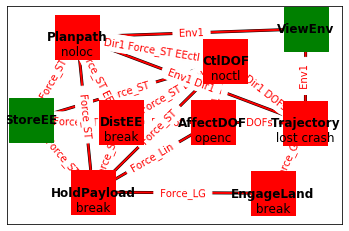

In [6]:
endresults, resgraph, mdlhist = fs.propagate.one_fault(static_mdl,'AffectDOF', 'openc')
rd.graph.show(resgraph, pos = graph_pos, scale=2)

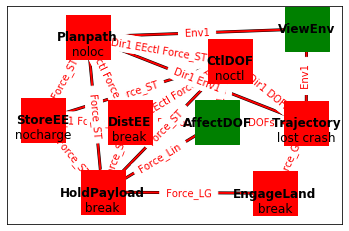

In [9]:
endresults, resgraph, mdlhist = fs.propagate.one_fault(static_mdl,'StoreEE', 'nocharge')
rd.graph.show(resgraph, pos = graph_pos, scale=2)

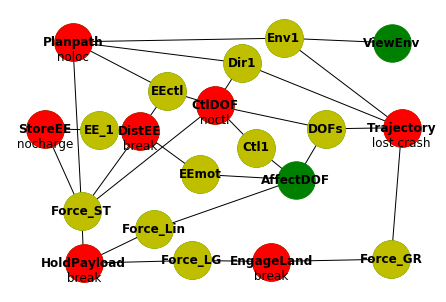

In [10]:
endresults, resgraph, mdlhist = fs.propagate.one_fault(static_mdl,'StoreEE', 'nocharge', gtype='bipartite')
rd.graph.show(resgraph, pos = bipartite_pos, scale=2, gtype='bipartite')

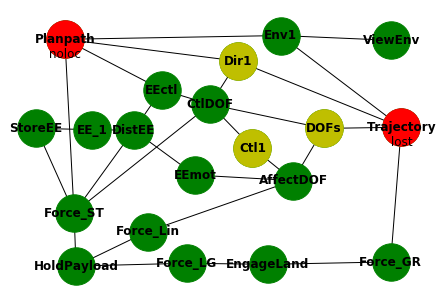

In [8]:
endresults, resgraph, mdlhist = fs.propagate.one_fault(static_mdl,'Planpath', 'noloc', gtype='bipartite')
rd.graph.show(resgraph, pos = bipartite_pos, scale=2, gtype='bipartite')

In [10]:
endclasses, mdlhists = fs.propagate.single_faults(static_mdl)

In [17]:
static_mdl.fxns

{'StoreEE': StoreEE StoreEE function: ({'soc': 2000}, {'nom'}),
 'DistEE': DistEE DistEE function: ({'EEtr': 1.0, 'EEte': 0.5}, {'nom', 'degr'}),
 'AffectDOF': AffectDOF AffectDOF function: ({'Eto': 1.0, 'Eti': 1.0, 'Ct': 1.0, 'Mt': 1.0, 'Pt': 1.0}, {'nom'}),
 'CtlDOF': CtlDOF CtlDOF function: ({'Cs': 1.0}, {'nom'}),
 'Planpath': Planpath PlanPath function: ({}, {'nom'}),
 'Trajectory': Trajectory Trajectory function: ({}, {'nom'}),
 'EngageLand': EngageLand EngageLand function: ({}, {'nom'}),
 'HoldPayload': HoldPayload HoldPayload function: ({}, {'nom'}),
 'ViewEnv': ViewEnv ViewEnvironment function: ({}, {'nom'})}

In [23]:
static_mdl.__class__(params=static_mdl.params).fxns

{'StoreEE': StoreEE StoreEE function: ({'soc': 2000}, {'nom'}),
 'DistEE': DistEE DistEE function: ({'EEtr': 1.0, 'EEte': 1.0}, {'nom'}),
 'AffectDOF': AffectDOF AffectDOF function: ({'Eto': 1.0, 'Eti': 1.0, 'Ct': 1.0, 'Mt': 1.0, 'Pt': 1.0}, {'nom'}),
 'CtlDOF': CtlDOF CtlDOF function: ({'Cs': 1.0}, {'nom'}),
 'Planpath': Planpath PlanPath function: ({}, {'nom'}),
 'Trajectory': Trajectory Trajectory function: ({}, {'nom'}),
 'EngageLand': EngageLand EngageLand function: ({}, {'nom'}),
 'HoldPayload': HoldPayload HoldPayload function: ({}, {'nom'}),
 'ViewEnv': ViewEnv ViewEnvironment function: ({}, {'nom'})}

In [20]:
scenlist=fs.propagate.list_init_faults(static_mdl)
scenlist

[{'faults': {'StoreEE': 'nocharge'},
  'properties': {'type': 'single-fault',
   'function': 'StoreEE',
   'fault': 'nocharge',
   'rate': 1e-05,
   'time': 1,
   'name': 'StoreEE nocharge, t=1'}},
 {'faults': {'DistEE': 'short'},
  'properties': {'type': 'single-fault',
   'function': 'DistEE',
   'fault': 'short',
   'rate': 3e-06,
   'time': 1,
   'name': 'DistEE short, t=1'}},
 {'faults': {'DistEE': 'degr'},
  'properties': {'type': 'single-fault',
   'function': 'DistEE',
   'fault': 'degr',
   'rate': 5e-06,
   'time': 1,
   'name': 'DistEE degr, t=1'}},
 {'faults': {'DistEE': 'break'},
  'properties': {'type': 'single-fault',
   'function': 'DistEE',
   'fault': 'break',
   'rate': 2.0000000000000003e-06,
   'time': 1,
   'name': 'DistEE break, t=1'}},
 {'faults': {'AffectDOF': 'short'},
  'properties': {'type': 'single-fault',
   'function': 'AffectDOF',
   'fault': 'short',
   'rate': 1.0000000000000002e-06,
   'time': 1,
   'name': 'AffectDOF short, t=1'}},
 {'faults': {'Affe

In [5]:
reshists, diffs, summaries = rd.process.hists(mdlhists)
static_fmea = rd.tabulate.fullfmea(endclasses, summaries)
static_fmea.sort_values('expected cost', ascending=False)

NameError: name 'mdlhists' is not defined

### Dynamic Model

- Behavior-over-time graph

- Dynamic/phase based FMEA

In [ ]:
class StoreEE(FxnBlock):
    def __init__(self, flows):
        self.failrate=1e-5
        self.assoc_modes({'nocharge':[1,300]})
        super().__init__(['EEout', 'FS'], flows, {'soc': 2000})
    def behavior(self, time):
        if      self.has_fault('nocharge'):   self.EEout.effort=0.0
        else: self.EEout.effort=1.0
class DistEE(FxnBlock):
    def __init__(self,flows):
        super().__init__(['EEin','EEmot','EEctl','ST'],flows, {'EEtr':1.0, 'EEte':1.0}, timely=False)
        self.failrate=1e-5
        self.assoc_modes({'short':[0.3,3000], 'degr':[0.5,1000], 'break':[0.2,2000]})
    def condfaults(self, time):
        if self.ST.support<0.5 or max(self.EEmot.rate,self.EEctl.rate)>2: 
            self.add_fault('break')
        if self.EEin.rate>2:
            self.add_fault('short')
    def behavior(self, time):
        if self.has_fault('short'): 
            self.EEte=0.0
            self.EEre=10
        elif self.has_fault('break'): 
            self.EEte=0.0
            self.EEre=0.0
        elif self.has_fault('degr'): self.EEte=0.5
        self.EEmot.effort=self.EEte*self.EEin.effort
        self.EEctl.effort=self.EEte*self.EEin.effort
        self.EEin.rate=m2to1([ self.EEin.effort, self.EEtr, max(self.EEmot.rate,self.EEctl.rate)])
class EngageLand(FxnBlock):
    def __init__(self,flows):
        super().__init__(['forcein', 'forceout'],flows, timely=False)
        self.failrate=1e-5
        self.assoc_modes({'break':[0.2, 1000], 'deform':[0.8, 1000]})
    def condfaults(self, time):
        if abs(self.forcein.value)>=2.0:      self.add_fault('break')
        elif abs(self.forcein.value)>1.5:    self.add_fault('deform')
    def behavior(self, time):
        self.forceout.value=self.forcein.value/2
            
class HoldPayload(FxnBlock):
    def __init__(self,flows):
        super().__init__(['FG', 'Lin', 'ST'],flows, timely=False)
        self.failrate=1e-6
        self.assoc_modes({'break':[0.2, 10000], 'deform':[0.8, 10000]})
    def condfaults(self, time):
        if abs(self.FG.value)>0.8:      self.add_fault('break')
        elif abs(self.FG.value)>1.0:    self.add_fault('deform')
    def behavior(self, time):
        #need to transfer FG to FA & FS???
        if self.has_fault('break'):     self.Lin.support, self.ST.support = 0,0
        elif self.has_fault('deform'):  self.Lin.support, self.ST.support = 0.5,0.5
        else:                           self.Lin.support, self.ST.support = 1.0,1.0
class AffectDOF(FxnBlock): #EEmot,Ctl1,DOFs,Force_Lin HSig_DOFs, RSig_DOFs
    def __init__(self, flows):     
        super().__init__(['EEin', 'Ctlin','DOF','Force'], flows,{'Eto': 1.0, 'Eti':1.0, 'Ct':1.0, 'Mt':1.0, 'Pt':1.0}, timely=False)
        self.failrate=1e-5
        self.assoc_modes({'short':[0.1, 200],'openc':[0.1, 200],'ctlup':[0.2, 500],'ctldn':[0.2, 500],
                          'ctlbreak':[0.2, 1000], 'mechbreak':[0.1, 500], 'mechfriction':[0.05, 500],
                          'propwarp':[0.01, 200],'propstuck':[0.02, 200], 'propbreak':[0.03, 200]})
    def behavior(self, time):
        self.Eti=1.0
        self.Eto=1.0
        if self.has_fault('short'):
            self.Eti=10
            self.Eto=0.0
        elif self.has_fault('openc'):
            self.Eti=0.0
            self.Eto=0.0
        if self.has_fault('ctlbreak'): self.Ct=0.0
        elif self.has_fault('ctldn'):  self.Ct=0.5
        elif self.has_fault('ctlup'):  self.Ct=2.0
        if self.has_fault('mechbreak'): self.Mt=0.0
        elif self.has_fault('mechfriction'):
            self.Mt=0.5
            self.Eti=2.0
        if self.has_fault('propstuck'):
            self.Pt=0.0
            self.Mt=0.0
            self.Eti=4.0
        elif self.has_fault('propbreak'): self.Pt=0.0
        elif self.has_fault('propwarp'):  self.Pt=0.5
        
        self.EEin.rate=self.Eti

        self.DOF.uppwr=self.Eto*self.Eti*self.Ctlin.upward*self.Ct*self.Mt*self.Pt
        self.DOF.planpwr=self.Eto*self.Eti*self.Ctlin.forward*self.Ct*self.Mt*self.Pt    
        
class CtlDOF(FxnBlock):
    def __init__(self, flows):
        super().__init__(['EEin','Dir','Ctl','DOFs','FS'],flows, {'Cs':1.0})
        self.failrate=1e-5
        self.assoc_modes({'noctl':[0.2, 10000], 'degctl':[0.8, 10000]})
    def condfaults(self, time):
        if self.FS.support<0.5: self.add_fault('noctl')
    def behavior(self, time):
        if self.has_fault('noctl'):    self.Cs=0.0
        elif self.has_fault('degctl'): self.Cs=0.5
        
        upthrottle=1.0
        if self.Dir.traj[2]>1:     upthrottle=2
        elif -1<self.Dir.traj[2]<1:  upthrottle= 1 + self.Dir.traj[2]
        elif self.Dir.traj[2]<=-1.0:   upthrottle = 0
            
        if self.Dir.traj[0]==0 and self.Dir.traj[1]==0: forwardthrottle=0.0
        else: forwardthrottle=1.0
        
        self.Ctl.forward=self.EEin.effort*self.Cs*forwardthrottle*self.Dir.power
        self.Ctl.upward=self.EEin.effort*self.Cs*self.Dir.power*upthrottle

class PlanPath(FxnBlock):
    def __init__(self, flows):
        super().__init__(['EEin','Env','Dir','FS'], flows)
        self.failrate=1e-5
        self.assoc_modes({'noloc':[0.2, 10000], 'degloc':[0.8, 10000]})
    def condfaults(self, time):
        if self.FS.support<0.5: self.add_fault('noloc')
    def behavior(self, t):
        self.Dir.assign([1,0,0])
        # faulty behaviors    
        if self.has_fault('noloc'):     self.Dir.assign([0,0,0])
        elif self.has_fault('degloc'):  self.Dir.assign([0,0,-1])
        if self.EEin.effort<0.5:
            self.Dir.power=0.0
            self.Dir.assign([0,0,0])

class Trajectory(FxnBlock):
    def __init__(self, flows):
        super().__init__(['Env','DOF', 'Dir', 'Force_GR'], flows)
        self.assoc_modes({'crash':[0, 100000], 'lost':[0.0, 50000]})
    def behavior(self, time):
        self.DOF.vertvel = max(min(-2+2*self.DOF.uppwr, 2), -2)
        self.Force_GR.value =self.DOF.vertvel
        self.DOF.planvel=self.DOF.planpwr
        if self.DOF.vertvel>1.5 or self.DOF.vertvel<-1:
            self.add_fault('crash')
            self.Env.elev=0.0
        if self.DOF.planvel>1.5 or self.DOF.planvel<0.5:
            self.add_fault('lost')
            self.x=0.0
        else:
            self.x=1.0

class ViewEnvironment(FxnBlock):
    def __init__(self, flows):
        super().__init__(['Env'], flows)
        self.failrate=1e-5
        self.assoc_modes({'poorview':[0.2, 10000]})

class Direc(Flow):
    def __init__(self):
        self.traj=[0,0,0]
        super().__init__({'x': self.traj[0], 'y': self.traj[1], 'z': self.traj[2], 'power': 1}, 'Trajectory')
    def assign(self, traj):
        self.x=traj[0]
        self.y=traj[1]
        self.z=traj[2]
        self.traj=traj
    def status(self):
        status={'x': self.traj[0], 'y': self.traj[1], 'z': self.traj[2], 'power': self.power}
        return status.copy()
        
class Drone(Model):
    def __init__(self, params={'graph_pos':{}, 'bipartite_pos':{}}):
        super().__init__()
        self.params=params
        #add flows to the model
        self.add_flow('Force_ST', {'support':1.0})
        self.add_flow('Force_Lin', {'support':1.0})
        self.add_flow('Force_GR' , {'value':0.0})
        self.add_flow('Force_LG', {'value':0.0})
        self.add_flow('EE_1', {'rate':1.0, 'effort':1.0})
        self.add_flow('EEmot', {'rate':1.0, 'effort':1.0})
        self.add_flow('EEctl', {'rate':1.0, 'effort':1.0})
        self.add_flow('Ctl1', {'forward':1.0, 'upward':1.0})
        self.add_flow('DOFs', {'vertvel':1.0, 'planvel':1.0, 'planpwr':1.0, 'uppwr':1.0})
        self.add_flow('Env1', {'x':0.0,'y':0.0,'elev':50} )
        # custom flows
        self.add_flow('Dir1', Direc())
        #add functions to the model
        flows=['EEctl', 'Force_ST']
        self.add_fxn('StoreEE',['EE_1', 'Force_ST'], fclass=StoreEE)
        self.add_fxn('DistEE', ['EE_1','EEmot','EEctl', 'Force_ST'], fclass=DistEE)
        self.add_fxn('AffectDOF',['EEmot','Ctl1','DOFs','Force_Lin'], fclass=AffectDOF)
        self.add_fxn('CtlDOF', ['EEctl', 'Dir1', 'Ctl1', 'DOFs', 'Force_ST'], fclass=CtlDOF)
        self.add_fxn('Planpath', ['EEctl', 'Env1','Dir1', 'Force_ST'], fclass=PlanPath)
        self.add_fxn('Trajectory', ['Env1','DOFs','Dir1', 'Force_GR'], fclass=Trajectory)
        self.add_fxn('EngageLand',['Force_GR', 'Force_LG'], fclass=EngageLand)
        self.add_fxn('HoldPayload',['Force_LG', 'Force_Lin', 'Force_ST'], fclass=HoldPayload)
        self.add_fxn('ViewEnv', ['Env1'], fclass=ViewEnvironment)
        
        self.construct_graph(graph_pos=params['graph_pos'], bipartite_pos=params['bipartite_pos'])
    def find_classification(self, g, endfaults, endflows, scen, mdlhist):
    
        repcost=sum([ c['rcost'] for f,m in endfaults.items() for a, c in m.items()])
        
        totcost=repcost
        rate=scen['properties']['rate']
        expcost=totcost*rate*1e5
        return {'rate':rate, 'cost': totcost, 'expected cost': expcost}

### Hierarchical Model

- Same as Dynamic?